# Data Cleaning and Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Data Set

In [2]:
df = pd.read_csv ("weather_classification_data.csv")

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### First Five Rows and Column

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Last five Rows and Column

In [5]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


### Total Rows and Columns

In [7]:
df.shape

(13200, 11)

### Information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


### Finding Missing Values

In [10]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

Temperature             0.0
Humidity                0.0
Wind Speed              0.0
Precipitation (%)       0.0
Cloud Cover             0.0
Atmospheric Pressure    0.0
UV Index                0.0
Season                  0.0
Visibility (km)         0.0
Location                0.0
Weather Type            0.0
dtype: float64

### Finding Duplicate

In [12]:
df.duplicated().sum()

0

### Identifying Garbadge Values

In [13]:
for i in df.select_dtypes(include = "object").columns:
    print (df[i].value_counts())
    print ("***"*10)

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
******************************
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
******************************
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
******************************
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
******************************


# Exploratory Data Analysis

### Descriptive Statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [15]:
df.describe(include = "object")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


### Histogram to understand the Distribution

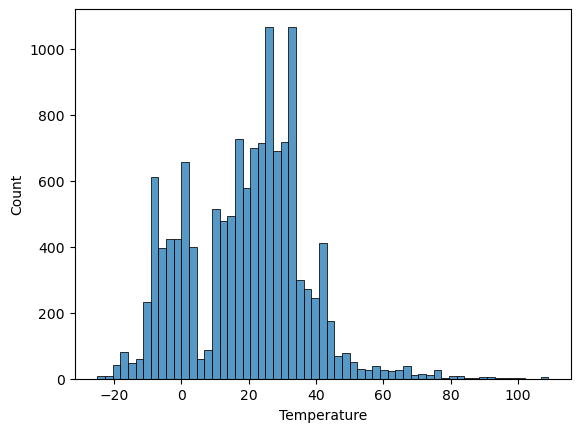

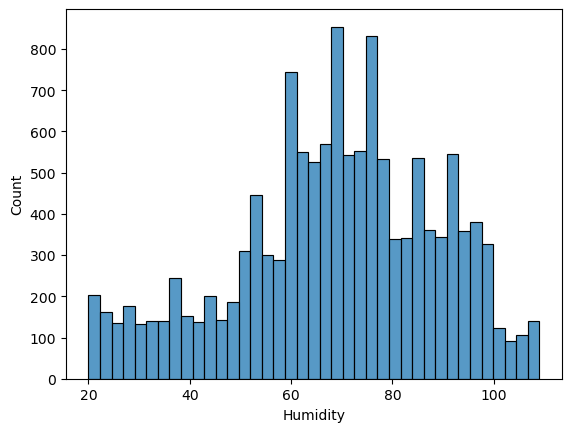

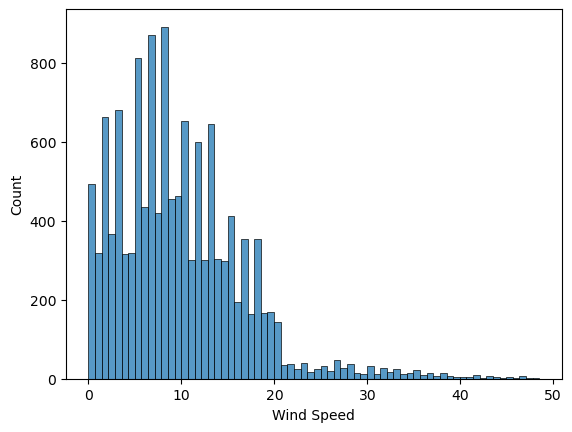

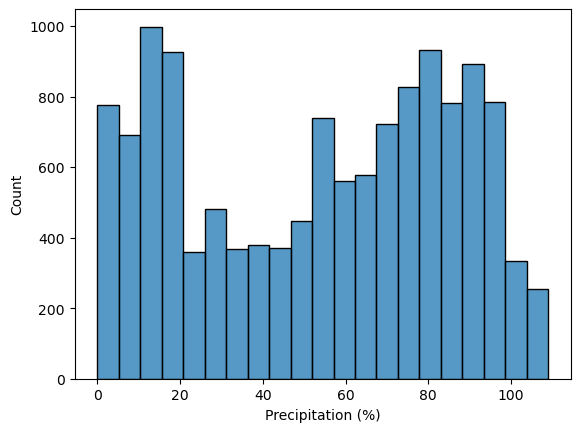

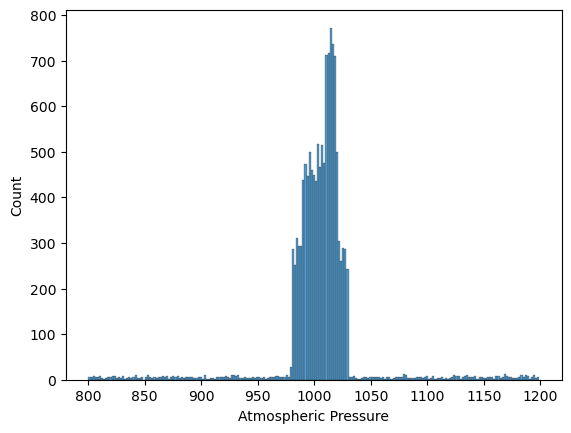

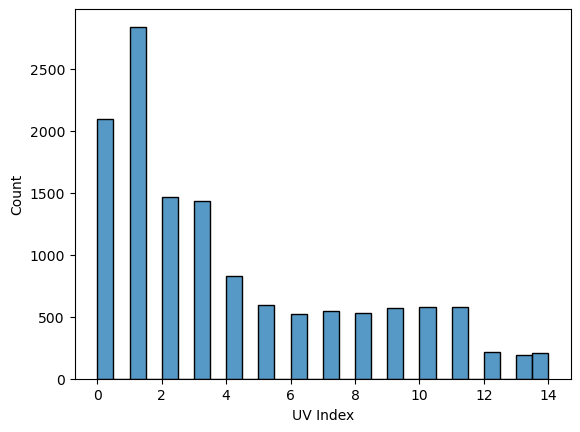

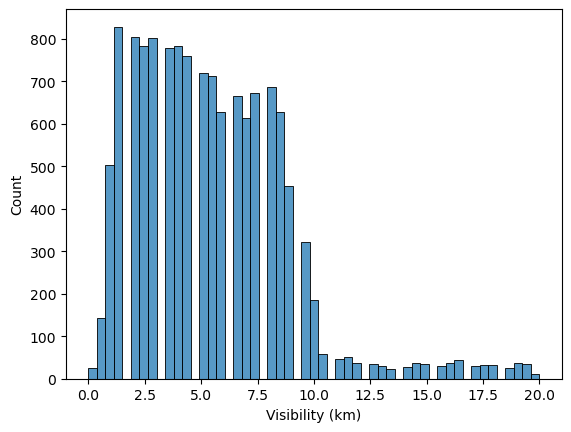

In [18]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

### BoxPlot to identify Outliers

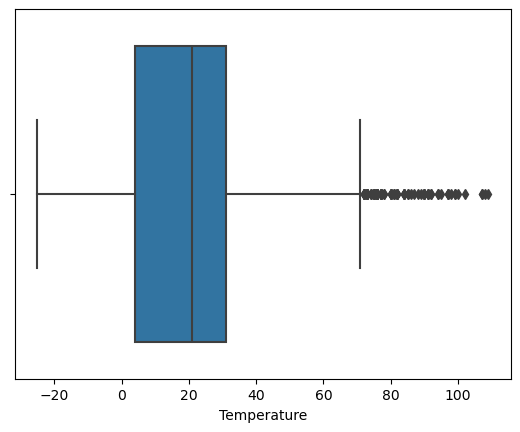

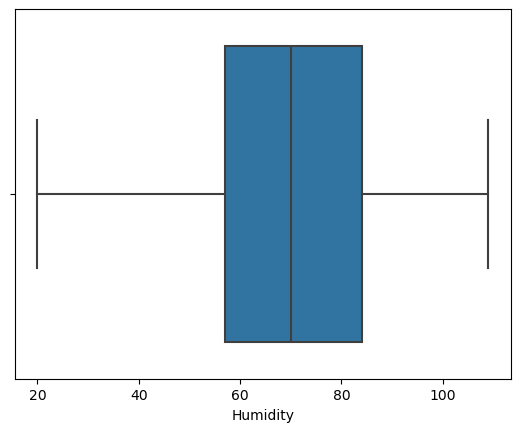

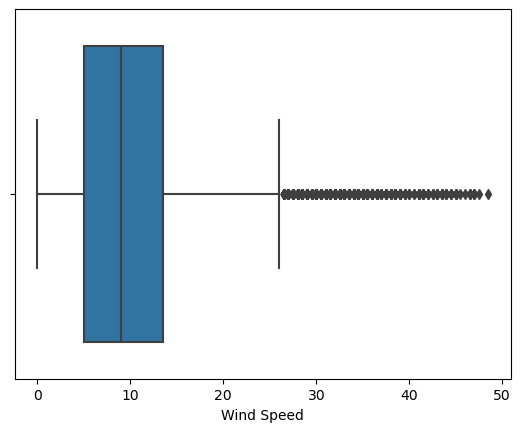

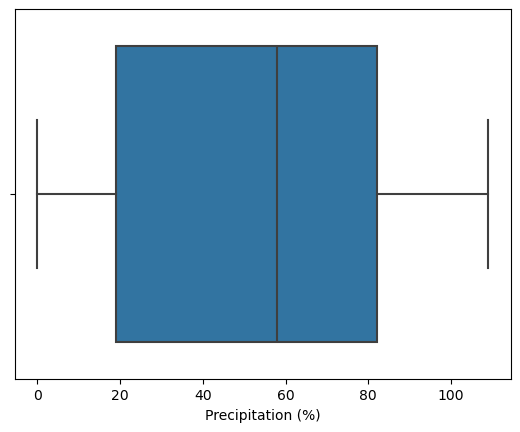

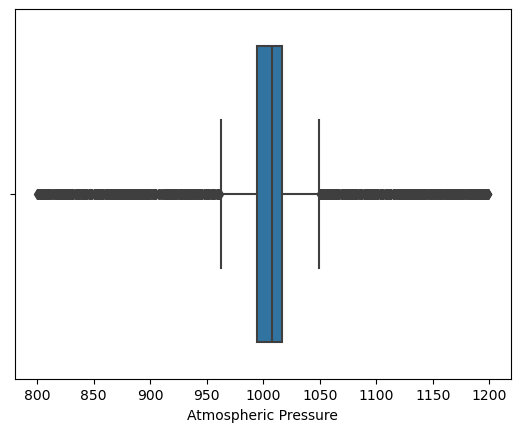

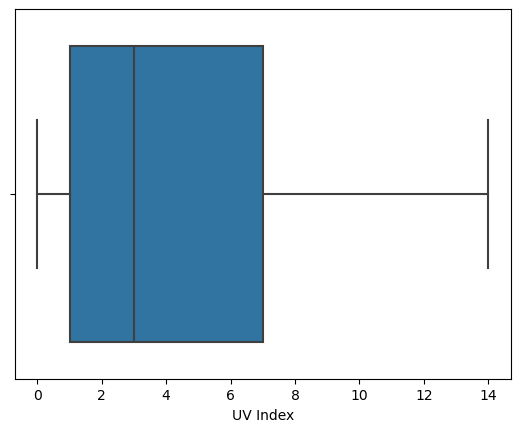

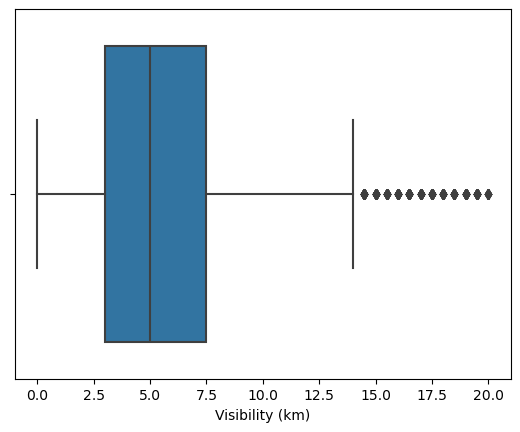

In [19]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

### Scatter plot to understand the relationship

# Assigned Tasks

### Identify missing values

In [20]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Drop rows with any missing values

In [22]:
df_dropna_rows = df.dropna()
df_dropna_rows

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Drop columns with any missing values

In [23]:
df_dropna_cols = df.dropna(axis=1)
df_dropna_cols

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Fill missing values with a specific value

In [24]:
df_fillna = df.fillna(0)
df_fillna

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Fill missing values using forward fill and backward fill methods

In [25]:
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

df_ffill
df_bfill

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Interpolate missing values

In [26]:
df_interpolate = df.interpolate()
df_interpolate

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Apply a function to transform the values of a column

In [29]:
df['Temperature_plus_10'] = df['Temperature'].apply(lambda x: x + 10)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,24.0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,49.0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,40.0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,48.0
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,20.0
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,9.0
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,40.0
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,13.0


### Normalize a column using Min-Max scaling

In [30]:
df['Atmospheric Pressure_MinMax'] = (df['Atmospheric Pressure'] - df['Atmospheric Pressure'].min()) / (df['Atmospheric Pressure'].max() - df['Atmospheric Pressure'].min())
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,24.0,0.527951
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,49.0,0.529480
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,40.0,0.547746
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,48.0,0.566614
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,37.0,0.477461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,20.0,0.508732
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,9.0,0.669298
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,40.0,0.532637
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,13.0,0.461425


### Standardize a column (z-score normalization)

In [31]:
df['Atmospheric Pressure_Standardized'] = (df['Atmospheric Pressure'] - df['Atmospheric Pressure'].mean()) / df['Atmospheric Pressure'].std()
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,24.0,0.527951,0.134198
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,49.0,0.529480,0.150596
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,48.0,0.566614,0.548987
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,9.0,0.669298,1.650612
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,13.0,0.461425,-0.579520


### Identify duplicate rows in the DataFrame

In [33]:
df[df.duplicated()]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized


### Drop duplicate rows

In [34]:
df_deduped = df.drop_duplicates()
df_deduped

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,24.0,0.527951,0.134198
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,49.0,0.529480,0.150596
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,48.0,0.566614,0.548987
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,9.0,0.669298,1.650612
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,13.0,0.461425,-0.579520


### Drop duplicate rows based on specific columns

In [35]:
df_deduped_specific = df.drop_duplicates(subset=['Cloud Cover'])
df_deduped_specific

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,24.0,0.527951,0.134198
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
134,29.0,77,0.5,91.0,cloudy,934.49,14,Autumn,17.0,inland,Sunny,39.0,0.336691,-1.917707


### Convert all string values in a column to lowercase

In [36]:
df['Season'] = df['Season'].str.lower()
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596
2,30.0,64,7.0,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
3,38.0,83,1.5,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987
4,27.0,74,17.0,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612
13197,30.0,77,5.5,28.0,overcast,1012.69,3,autumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467
13198,3.0,76,10.0,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520


### Remove leading and trailing spaces from string values in a column

In [37]:
df['Cloud Cover'] = df['Cloud Cover'].str.strip()
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596
2,30.0,64,7.0,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
3,38.0,83,1.5,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987
4,27.0,74,17.0,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612
13197,30.0,77,5.5,28.0,overcast,1012.69,3,autumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467
13198,3.0,76,10.0,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520


### Replace a specific substring in a column with another substring

In [38]:
df['Season'] = df['Season'].str.replace('a', '@')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596
2,30.0,64,7.0,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566
3,38.0,83,1.5,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987
4,27.0,74,17.0,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612
13197,30.0,77,5.5,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467
13198,3.0,76,10.0,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520


### Extract a substring from each value in a column

In [39]:
df['Initial'] = df['Season'].str[:1]
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198,w
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596,s
2,30.0,64,7.0,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566,s
3,38.0,83,1.5,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987,s
4,27.0,74,17.0,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987,s
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612,w
13197,30.0,77,5.5,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467,@
13198,3.0,76,10.0,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520,w


### Convert a column to datetime format

In [42]:
df['Wind Speed'] = pd.to_datetime(df['Wind Speed'])
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial
0,14.0,73,1970-01-01 00:00:00.000000009,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198,w
1,39.0,96,1970-01-01 00:00:00.000000008,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596,s
2,30.0,64,1970-01-01 00:00:00.000000007,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566,s
3,38.0,83,1970-01-01 00:00:00.000000001,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987,s
4,27.0,74,1970-01-01 00:00:00.000000017,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,1970-01-01 00:00:00.000000014,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987,s
13196,-1.0,76,1970-01-01 00:00:00.000000003,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612,w
13197,30.0,77,1970-01-01 00:00:00.000000005,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467,@
13198,3.0,76,1970-01-01 00:00:00.000000010,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520,w


### Extract year, month, and day from a datetime column

In [46]:
df['Join_Year'] = df['Wind Speed'].dt.year
df['Join_Month'] = df['Wind Speed'].dt.month
df['Join_Day'] = df['Wind Speed'].dt.day
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial,Join_Year,Join_Month,Join_Day
0,14.0,73,1970-01-01 00:00:00.000000009,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198,w,1970,1,1
1,39.0,96,1970-01-01 00:00:00.000000008,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596,s,1970,1,1
2,30.0,64,1970-01-01 00:00:00.000000007,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566,s,1970,1,1
3,38.0,83,1970-01-01 00:00:00.000000001,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987,s,1970,1,1
4,27.0,74,1970-01-01 00:00:00.000000017,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475,w,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,1970-01-01 00:00:00.000000014,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987,s,1970,1,1
13196,-1.0,76,1970-01-01 00:00:00.000000003,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612,w,1970,1,1
13197,30.0,77,1970-01-01 00:00:00.000000005,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467,@,1970,1,1
13198,3.0,76,1970-01-01 00:00:00.000000010,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520,w,1970,1,1


### Filter rows based on a date range

In [50]:
df_date_filtered = df[(df['Wind Speed'] >= '2021-01-01') & (df['Wind Speed'] <= '2021-12-31')]
df_date_filtered

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial,Join_Year,Join_Month,Join_Day


### Convert a categorical column to numerical using one-hot encoding

In [49]:
df_one_hot = pd.get_dummies(df, columns=['Temperature'])
df_one_hot

,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,...,Temperature_94.0,Temperature_95.0,Temperature_97.0,Temperature_98.0,Temperature_99.0,Temperature_100.0,Temperature_102.0,Temperature_107.0,Temperature_108.0,Temperature_109.0
0,73,1970-01-01 00:00:00.000000009,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,...,False,False,False,False,False,False,False,False,False,False
1,96,1970-01-01 00:00:00.000000008,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,...,False,False,False,False,False,False,False,False,False,False
2,64,1970-01-01 00:00:00.000000007,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,...,False,False,False,False,False,False,False,False,False,False
3,83,1970-01-01 00:00:00.000000001,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,...,False,False,False,False,False,False,False,False,False,False
4,74,1970-01-01 00:00:00.000000017,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,74,1970-01-01 00:00:00.000000014,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,...,False,False,False,False,False,False,False,False,False,False
13196,76,1970-01-01 00:00:00.000000003,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,...,False,False,False,False,False,False,False,False,False,False
13197,77,1970-01-01 00:00:00.000000005,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,...,False,False,False,False,False,False,False,False,False,False
13198,76,1970-01-01 00:00:00.000000010,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,...,False,False,False,False,False,False,False,False,False,False


### Convert a categorical column to numerical using label encoding

In [51]:
df['Gender_Label'] = df['Humidity'].astype('category').cat.codes
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial,Join_Year,Join_Month,Join_Day,Gender_Label
0,14.0,73,1970-01-01 00:00:00.000000009,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198,w,1970,1,1,53
1,39.0,96,1970-01-01 00:00:00.000000008,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596,s,1970,1,1,76
2,30.0,64,1970-01-01 00:00:00.000000007,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566,s,1970,1,1,44
3,38.0,83,1970-01-01 00:00:00.000000001,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987,s,1970,1,1,63
4,27.0,74,1970-01-01 00:00:00.000000017,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475,w,1970,1,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,1970-01-01 00:00:00.000000014,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987,s,1970,1,1,54
13196,-1.0,76,1970-01-01 00:00:00.000000003,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612,w,1970,1,1,56
13197,30.0,77,1970-01-01 00:00:00.000000005,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467,@,1970,1,1,57
13198,3.0,76,1970-01-01 00:00:00.000000010,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520,w,1970,1,1,56


### Create polynomial features from existing numerical columns

In [53]:
df['Humidity_Squared'] = df['Humidity'] ** 2
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature_plus_10,Atmospheric Pressure_MinMax,Atmospheric Pressure_Standardized,Initial,Join_Year,Join_Month,Join_Day,Gender_Label,Humidity_Squared
0,14.0,73,1970-01-01 00:00:00.000000009,82.0,partly cloudy,1010.82,2,winter,3.5,inland,Rainy,24.0,0.527951,0.134198,w,1970,1,1,53,5329
1,39.0,96,1970-01-01 00:00:00.000000008,71.0,partly cloudy,1011.43,7,spring,10.0,inland,Cloudy,49.0,0.529480,0.150596,s,1970,1,1,76,9216
2,30.0,64,1970-01-01 00:00:00.000000007,16.0,clear,1018.72,5,spring,5.5,mountain,Sunny,40.0,0.547746,0.346566,s,1970,1,1,44,4096
3,38.0,83,1970-01-01 00:00:00.000000001,82.0,clear,1026.25,7,spring,1.0,coastal,Sunny,48.0,0.566614,0.548987,s,1970,1,1,63,6889
4,27.0,74,1970-01-01 00:00:00.000000017,66.0,overcast,990.67,1,winter,2.5,mountain,Rainy,37.0,0.477461,-0.407475,w,1970,1,1,54,5476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,1970-01-01 00:00:00.000000014,71.0,overcast,1003.15,1,summer,1.0,mountain,Rainy,20.0,0.508732,-0.071987,s,1970,1,1,54,5476
13196,-1.0,76,1970-01-01 00:00:00.000000003,23.0,cloudy,1067.23,1,winter,6.0,coastal,Snowy,9.0,0.669298,1.650612,w,1970,1,1,56,5776
13197,30.0,77,1970-01-01 00:00:00.000000005,28.0,overcast,1012.69,3,@utumn,9.0,coastal,Cloudy,40.0,0.532637,0.184467,@,1970,1,1,57,5929
13198,3.0,76,1970-01-01 00:00:00.000000010,94.0,overcast,984.27,0,winter,2.0,inland,Snowy,13.0,0.461425,-0.579520,w,1970,1,1,56,5776
